Veri seti Kaggle' dan alınmıstır.
Thera Bank, büyüyen bir müşteri portfoyüne sahip bir ABD bankasıdır.Krediyi satın alma olasılığı daha yüksek olan potansiyel müşterileri belirlemesine yardımcı olacak bir model oluşturması isteniyor.

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
from google.colab import files
uploaded = files.upload()
import io
data = io.BytesIO(uploaded['Bank_Personal_Loan_Modelling.csv'])

Saving Bank_Personal_Loan_Modelling.csv to Bank_Personal_Loan_Modelling.csv


In [ ]:
df=pd.read_csv(data)

In [ ]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:

df=df.rename(columns={'Age':'Yas','Experience':'MeslekiDeneyim','Income':'YillikGelir','ZIP Code':'PostaKodu',
                      'Family':'AileBireyiSayisi','CCAvg':'KKharcama','Education':'EgitimDüzeyi',
                      'Mortgage':'Ipotek','Personal Loan':'BireyselKredi','Securities Account':'MenkulKiymetHesabi','CD Account':'MevduatHesabi',
                      'Online':'OnlineBankacilik','CreditCard':'KrediKarti'})

In [ ]:
df.head()

,ID,Yas,MeslekiDeneyim,YillikGelir,PostaKodu,AileBireyiSayisi,KKharcama,EgitimDüzeyi,Ipotek,BireyselKredi,MenkulKiymetHesabi,MevduatHesabi,OnlineBankacilik,KrediKarti
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
df.shape

(5000, 14)

In [ ]:
df.isnull().sum()

ID                    0
Yas                   0
MeslekiDeneyim        0
YillikGelir           0
PostaKodu             0
AileBireyiSayisi      0
KKharcama             0
EgitimDüzeyi          0
Ipotek                0
BireyselKredi         0
MenkulKiymetHesabi    0
MevduatHesabi         0
OnlineBankacilik      0
KrediKarti            0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Yas                 5000 non-null   int64  
 2   MeslekiDeneyim      5000 non-null   int64  
 3   YillikGelir         5000 non-null   int64  
 4   PostaKodu           5000 non-null   int64  
 5   AileBireyiSayisi    5000 non-null   int64  
 6   KKharcama           5000 non-null   float64
 7   EgitimDüzeyi        5000 non-null   int64  
 8   Ipotek              5000 non-null   int64  
 9   BireyselKredi       5000 non-null   int64  
 10  MenkulKiymetHesabi  5000 non-null   int64  
 11  MevduatHesabi       5000 non-null   int64  
 12  OnlineBankacilik    5000 non-null   int64  
 13  KrediKarti          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
df.drop('ID', axis=1, inplace=True)

In [ ]:
category_col = ['BireyselKredi', 'MenkulKiymetHesabi','AileBireyiSayisi', 'MevduatHesabi', 'OnlineBankacilik', 'KrediKarti', 'PostaKodu', 'EgitimDüzeyi']
df[category_col] = df[category_col].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Yas                 5000 non-null   int64   
 1   MeslekiDeneyim      5000 non-null   int64   
 2   YillikGelir         5000 non-null   int64   
 3   PostaKodu           5000 non-null   category
 4   AileBireyiSayisi    5000 non-null   category
 5   KKharcama           5000 non-null   float64 
 6   EgitimDüzeyi        5000 non-null   category
 7   Ipotek              5000 non-null   int64   
 8   BireyselKredi       5000 non-null   category
 9   MenkulKiymetHesabi  5000 non-null   category
 10  MevduatHesabi       5000 non-null   category
 11  OnlineBankacilik    5000 non-null   category
 12  KrediKarti          5000 non-null   category
dtypes: category(8), float64(1), int64(4)
memory usage: 260.1 KB


In [ ]:
df.head()

,Yas,MeslekiDeneyim,YillikGelir,PostaKodu,AileBireyiSayisi,KKharcama,EgitimDüzeyi,Ipotek,BireyselKredi,MenkulKiymetHesabi,MevduatHesabi,OnlineBankacilik,KrediKarti
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
df["PostaKodu"].unique()

[91107, 90089, 94720, 94112, 91330, ..., 90068, 94970, 90813, 94404, 94598]
Length: 467
Categories (467, int64): [9307, 90005, 90007, 90009, ..., 96094, 96145, 96150, 96651]

In [ ]:
df['PostaKodu'].value_counts()

94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
94087      1
90813      1
94404      1
90068      1
9307       1
Name: PostaKodu, Length: 467, dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Yas,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
MeslekiDeneyim,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
YillikGelir,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
KKharcama,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Ipotek,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0


In [ ]:
df.groupby(["BireyselKredi"])["Yas"].mean()

BireyselKredi
0    45.367257
1    45.066667
Name: Yas, dtype: float64

In [ ]:
df.groupby(["BireyselKredi"])["MeslekiDeneyim"].mean()

BireyselKredi
0    20.132301
1    19.843750
Name: MeslekiDeneyim, dtype: float64

In [ ]:
df.groupby(["BireyselKredi"])["YillikGelir"].mean()

BireyselKredi
0     66.237389
1    144.745833
Name: YillikGelir, dtype: float64

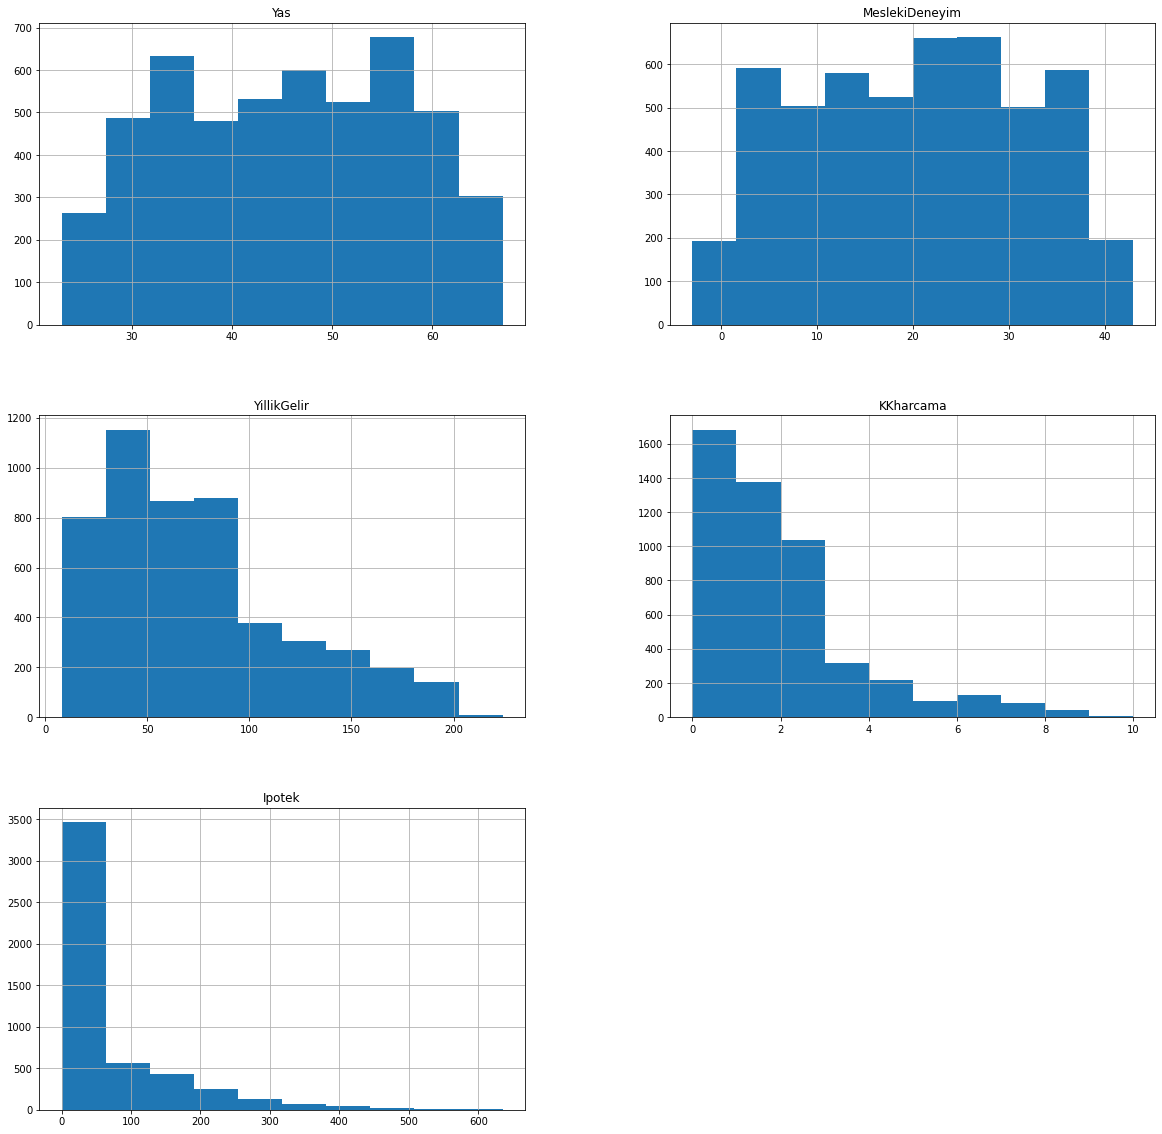

In [ ]:
df.hist(figsize=(20,20));

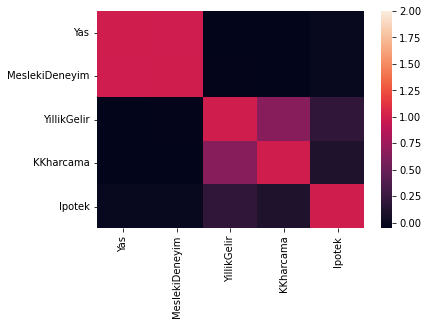

In [ ]:
corelation=df.corr()
sns.heatmap(corelation, vmax=2)


In [ ]:
y = df["BireyselKredi"]
X = df.drop(["BireyselKredi"], axis=1)

In [ ]:
X_train,X_test, y_train, y_test =train_test_split(X,y, test_size=0.20, random_state=120)

Lojistik regresyon ile modelleme



In [70]:
lr = LogisticRegression(max_iter=1000)

In [71]:
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [86]:
pre1=lr.predict(X_test)

In [87]:
accuracy_score(y_test,pre1)

0.936

In [92]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
confusion_matrix(y_test,pre1)

array([[883,  17],
       [ 47,  53]])

KNN ile Modelleme

In [89]:
knn=KNeighborsClassifier(6)
knn.fit(X_train, y_train)
pre2=knn.predict(X_test)

In [90]:
accuracy_score(y_test, pre2)

0.89

In [91]:
confusion_matrix(y_test,pre2)

array([[878,  22],
       [ 88,  12]])

Random Forest ile modelleme


In [94]:
model= RandomForestClassifier()
model.fit(X_train, y_train)
pre3= model.predict(X_test)
accuracy_score(y_test,pre3)

0.994

In [95]:
confusion_matrix(y_test,pre3)

array([[898,   2],
       [  4,  96]])

GBM ile modelleme

In [97]:
model= GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=1)
model.fit(X_train, y_train)
pre4= model.predict(X_test)
accuracy_score(y_test,pre4)

0.976

In [104]:
confusion_matrix(y_test,pre4)

array([[892,   8],
       [ 16,  84]])

SVM ile modelleme

In [99]:
#normalizasyon
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [101]:
classifier=SVC(kernel='linear', random_state=0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [103]:
pre5=classifier.predict(X_test)
accuracy_score(y_test,pre5)

0.953

In [105]:
confusion_matrix(y_test,pre5)

array([[894,   6],
       [ 41,  59]])